# Homework 04 - Numpy

### Exercise 1 - Terminology

Describe the following terms with your own words:

***numpy array:***...is a matrix to strucutre data. Is a datatype in numpy

***broadcasting:***...defines how numpy treats arrays with different shapes. With broadcasting it is possible to combine for example a vector and a scalar.

Answer the following questions:

***What is the difference between a Python list and a Numpy array?***
You can do broadcasting. Arrays are stored more efficiently and you can define the storage which is needed for each element. Arrays are n-dimensional lists.

***How can you avoid using loops or list comprehensions when working with Numpy?***
with Broadcasting ;-)


***Give different examples of usages of square brackets `[]` in Python and Numpy? Describe at least two completely different ones!***
1. Creating a list: with [] one can create a list (or a numpy array)
2. Indexing a list (or a numpy array): [] one can request elements of the list, depending on the index in the brackets


***Give different examples of usages of round brackets `()` in Python and Numpy? Describe at least two completely different ones! (Bonus: give a third example not covered in the lecture until now!)***
1. Usage for calculations: e.g. (x-y)*(x+y)
2. Functions: def function (x): ... to pass arguments to a function
3. To create a tuple
4. inheritance when creating a class



### Exercise 2 - rotate and plot points in 2D

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

The result should like like this:

 cos winkel  -sin winkel
rotation matrix = ( ) sin winkel cos winkel

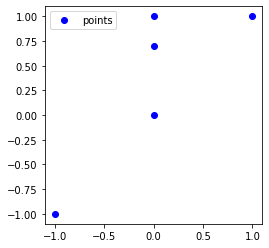

In [10]:
points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T

plt.plot (points[0], points[1], 'o',  label = 'points', color = 'blue')
plt.gca().set_aspect('equal')
plt.legend()

In [11]:
theta = np.radians(90)
theta_cos = np.cos(theta)
theta_sin = np.sin(theta)
rotation_matrix = np.array(((theta_cos, -theta_sin), (theta_sin, theta_cos)))

rotated_matrix = rotation_matrix @ points
rotated_matrix.T

array([[ 0.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00, -1.0000000e+00],
       [-1.0000000e+00,  6.1232340e-17],
       [-7.0000000e-01,  4.2862638e-17]])

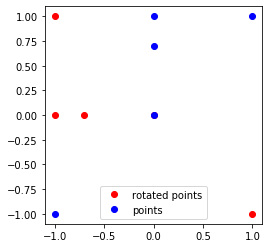

In [12]:
plt.plot(rotated_matrix [0], rotated_matrix [1], 'o', label = 'rotated points', color = 'red')
plt.plot (points[0], points[1], 'o', label = 'points', color = 'blue')
plt.gca().set_aspect('equal')
plt.legend()

### Exercise 3 - Flatten the curve

Copy the function `new_infections(t, k)` from last week's homework (exercise 3) and re-do the exercise using Numpy arrays instead of Python lists.

What needs to be changed in the function `new_infections(t, k)` to make this work?

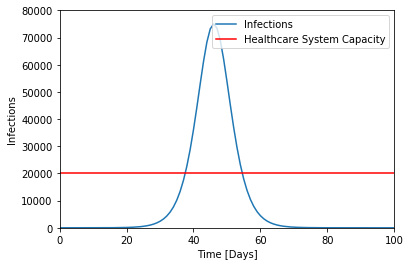

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np



def new_infections(t, k):
    P=1000000
    i0=1
    result = (np.exp(-k*P*t)*k*P**2*(-1+P/i0))/(1+np.exp(-k*P*t)*(-1+P/i0))**2
    return result
        


P=1000000
k1=3/(P*10)
t = np.array([i for i in range(250)])


infect_list = new_infections(t, k1)


time_scale=list(range(0,250))

x_limit = [0, 100]
y_limit = [0, 80000]
breakdown_limit = 20000
x = [20000 for i in range(150)]

plt.plot(time_scale,infect_list, label = 'Infections')
plt.plot(x, c='r', label = 'Healthcare System Capacity')
plt.xlim(x_limit)
plt.ylim(y_limit)
plt.legend(loc=1)
plt.xlabel ('Time [Days]')
plt.ylabel ('Infections')
plt.show()


### Exercise 4 - Mean of random numbers

Generate 100 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,100$ and plot this list too.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2-4 different ways*** to look up what a numpy function does!

<ol>
    <li>google is one good option</li>
    <li>name of the function + ?</li>
    <li>ask someone who knows python</li>
    <li>use PyCharm</li>
</ol>

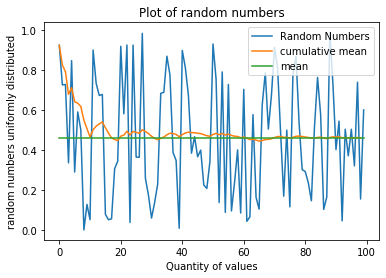

In [48]:
import numpy as np
import matplotlib.pyplot as plt

random_numbers=np.random.uniform(low=0, high=1, size=100)


plt.plot(random_numbers, label="Random Numbers")


def random_numbers_mean(x):
    random_numbers_sum=np.sum(x)
    random_numbers_length=len(x)
    calculated_mean=[random_numbers_sum/random_numbers_length]
    return calculated_mean


#second option

def random_numbers_mean1(x):
    mean=[x.mean()]
    return mean

mean_list=random_numbers_mean(random_numbers)*100


#as we where not quite sure if our interpretation of the exercise was correct, here another solution 



cum_mean=[]

for i in range(1,100):
    s=sum(random_numbers[0:i])/i
    cum_mean.append(s)


plt.plot(cum_mean, label="cumulative mean")


plt.plot(mean_list, label="mean")
plt.title("Plot of random numbers")
plt.xlabel("Quantity of values")
plt.ylabel("random numbers uniformly distributed")

plt.legend()
plt.show()



Maybe here it would be better to work with lists, than with arrays. To plot the random number´s mean one can use a list that contains 100 times this mean value. To create such a list one can simply multiply the one-item-list of the mean with 100. This list could be plotted and a horizontal line would be the result. If one do this with an array, a single value (mean multiplied with 100) would be returnd and it could be not plotted like that.

Mathematicaly this shows the "law of large numbers". As you can see in the Plot the more numbers you take for the calcuation of the mean, the closer the value ist to the real mean. 